In [1]:
# Directly Copy from HW1
class JJCV_Read_Draw():
    """
    ## Description
    JJCV_Read_Draw() is used for (1) reading image (2) drawing image
    Input: cmap
    
    ## Public methods:
    1. read_and_draw
        Input 
            (String) img_path
            (String) mode
        Output
            (Numpy Array) img
    
    2. common_plot
        Input
            (Numpy Array) img
            (Boolean) axis_toggle
        Output
            Nothing
    
    3. common_read
        Input
            (String) img_path
            (String) mode
        Output
            (Numpy Array) img
            
    ## Private methods:
    1. private_jj_imread
        Input
            (String) img_path
        Output
            (Numpy Array) img
        
    2. private_get_center_area
        Input
            (Numpy Array) img
            (Integer) img_size
            (Integer) center_size
        Output
            (Numpy Array) img
    """
    def __init__(self, cmap):
        self.cmap = cmap
    
    def common_read(self, img_path, mode):
        if mode == "bmp":
            img = cv.imread(img_path)[:,:,0]
        elif mode == "raw":
            img = self.private_jj_imread(img_path)
        return img
    
    def common_draw(self, img, axis_toggle):
        plt.figure(figsize=(5,5))
        plt.imshow(img, cmap=self.cmap)
        if axis_toggle:
            plt.axis("off")
        plt.show()
            
    def read_and_draw(self, img_path, mode):

        img = self.common_read(img_path, mode)
        self.common_draw(img, True)
        #self.common_draw(self.private_get_center_area(img, 512,10), True)
        
        return np.array(img)

    def private_jj_imread(self, img_path):
        img = np.empty((512, 512), np.uint8)
        file = open(img_path, "rb").read()

        for x in range(512):
            for y in range(512):
                img[x, y] = file[x * 512 + y]
        return img

    # for square
    def private_get_center_area(self, img, img_size, center_size):
        mid = float(img_size)/2.
        half = center_size/2
        upper_bound = int(mid) + int(half) 
        lower_bound = int(mid) - int(half)
        return img[lower_bound:upper_bound, lower_bound:upper_bound]
    
    # for rectangle
    def private_get_center_area_2(self, img, img_height, img_width, center_size):
        vertical_mid = float(img_height)/2.
        horizontal_mid = float(img_width)/2.
        half = center_size/2
        
        vertical_upper_bound = int(vertical_mid) + int(half) 
        vertical_lower_bound = int(vertical_mid) - int(half)
        
        horizontal_upper_bound = int(horizontal_mid) + int(half) 
        horizontal_lower_bound = int(horizontal_mid) - int(half)
        return img[vertical_lower_bound:vertical_upper_bound, horizontal_lower_bound:horizontal_upper_bound]

class JJCV_Enhance(JJCV_Read_Draw):
    """
    ## Description
    JJCV_Enhance() is used for (point-wisely) enhancing image
    Input: cmap
    
    ## Public methods:
    1. image_negative
        Input 
            (Numpy Array) img
        Output
            (Numpy Array) img
    
    2. log_transform
        Input
            (Numpy Array) img
        Output
            (Numpy Array) img
    
    3. gamma_transform
        Input
            (Numpy Array) img
            (Int) gamma
        Output
            (Numpy Array) img
            
    ## Private methods:
        pass
    """
    def __init__(self, cmap):
        super().__init__(cmap)

    def image_negative(self, img):
        w, h = img.shape
        for x in range(w):
            for y in range(h):
                img[x, y] = 255 - img[x, y]
        self.common_draw(img, True)
        self.common_draw(self.private_get_center_area(img, 512, 10), True)
        return img

    def log_transform(self, img):
        """ 
        s=c*log(r+1)
        s = output pixel
        r = input pixel
        c = 255/(log(1 + max_input_pixel_value))
        """
        c = 255/(np.log(1 + 255))
        w, h = img.shape
        for x in range(w):
            for y in range(h):
                img[x, y] = c * np.log(img[x, y] + 1)
        self.common_draw(img, True)
        self.common_draw(self.private_get_center_area(img, 512,10), True)
        return img   

    def gamma_transform(self, img, gamma):
        """
        s=c*r^γ
        s = output pixel
        r = input pixel
        c = 255*(img/255)
        gamma = 0.4 ~ 255
        """
        w, h = img.shape
        for x in range(w):
            for y in range(h):
                img[x, y] = 255 * (img[x, y]/255) ** gamma
        self.common_draw(img, True)
        #self.common_draw(self.private_get_center_area(img, 512,10), True)
        return img   

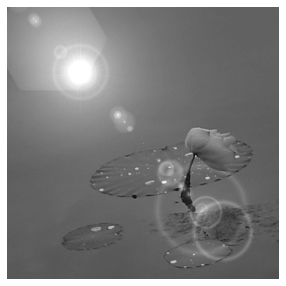

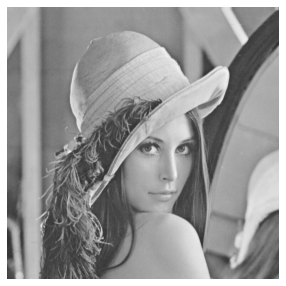

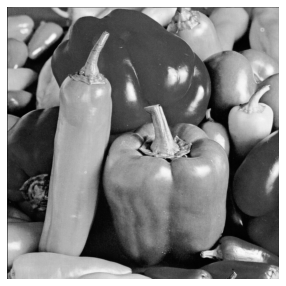

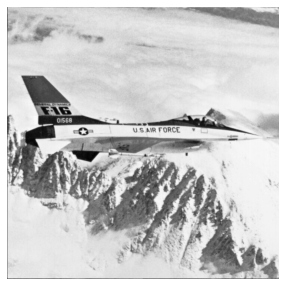

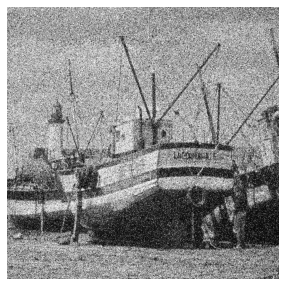

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

jjcv_rd = JJCV_Read_Draw(cmap="gray")
BASE_DIR = "../Data/Hw2/data/"
FILENAME_LIST = ["flower.raw", "lena.raw", "peppers.raw", "F16.raw", "Noisy.raw"]

for fname in FILENAME_LIST:
    fname = f"{BASE_DIR}{fname}"
    mode = fname[-3:]
    jjcv_rd.read_and_draw(fname, mode)

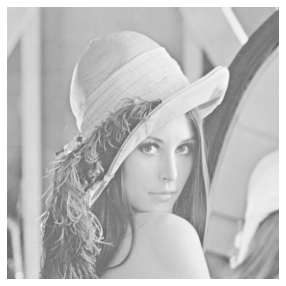

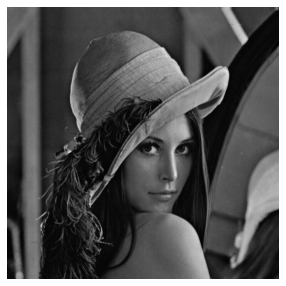

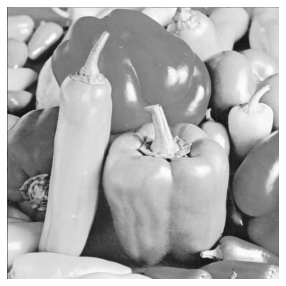

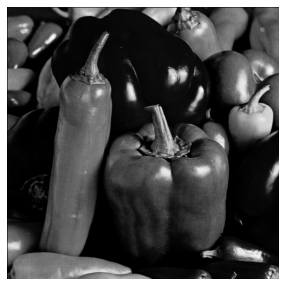

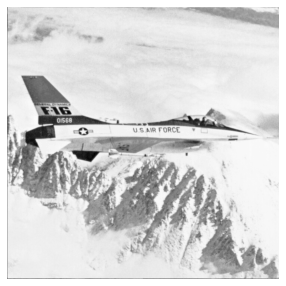

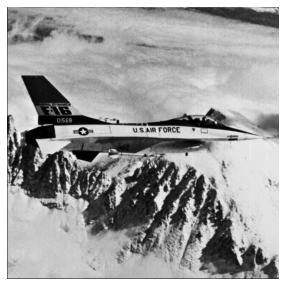

In [3]:
jjcv_enhance = JJCV_Enhance(cmap="gray")
FILENAME_LIST = ["lena.raw", "peppers.raw", "F16.raw"]
for fname in FILENAME_LIST:
    fname = f"{BASE_DIR}{fname}"
    mode = fname[-3:]
    img = jjcv_rd.common_read(fname, mode)
    
#     # Tran 1: image negative
#     img_enhance = jjcv_enhance.image_negative(img)
    
#     #  Tran 2: log transform
#     img_enhance = jjcv_enhance.log_transform(img)
    
    # Tran 3: gamma transform
    img_enhance = jjcv_enhance.gamma_transform(img, gamma=0.5)
    img_enhance = jjcv_enhance.gamma_transform(img, gamma=5)


In [4]:
class JJCV_Hist():
    
    def __init__(self):
        pass
    
    def init_containers(self):
        d_histogram, d_cumulative, d_map = {}, {}, {}
        for i in range(256):
            d_histogram[i], d_cumulative[i], d_map[i] = 0, 0, 0
        return d_histogram, d_cumulative, d_map
    
    def get_backward_map_from_ref_map_dict(self, ref_map_dict):
        backward_map = {}
        for key, val in zip(ref_map_dict.keys(), ref_map_dict.values()):
            if val not in backward_map:
                backward_map[val] = key
            else:
                continue

        for i in range(256):
            if i not in backward_map:
                val = jjcv_hist.assign_key_a_proper_val(backward_map, i)
                backward_map[i] = val

        return backward_map
    
    def global_histogram_equalization(self, img, fname, gamma, toggle):

        height, width = img.shape
        d_hist, d_cum, d_map = self.init_containers()
        
        # Step 1: Make Histogram
        d_hist = self.make_histogram(img, d_hist)
        
        # (Optional) Draw Histogram Before Equalization
        if toggle:
            x_axis, y_axis = d_hist.keys(), d_hist.values()
            self.draw_histogram(title=f"{fname} {gamma} Before Equalization", xlabel="Pixel Values: 0 - 255", ylabel="Frequency", x_axis=x_axis, y_axis=y_axis)
        
        # Step 2: Make Cumulative Sum
        d_cum = self.make_cumulative_sum(d_cum, d_hist)

        # Step 3: Make Mapping
        d_map = self.make_map(img, d_map, d_cum)

        # Step 4: Map Image
        e_img = self.map_image(img, d_map)
                
        # (Optional) Draw Histogram After Equalization
        if toggle:
            e_d_hist, _, _ = self.init_containers()
            e_d_hist = self.make_histogram(e_img, e_d_hist)
        
            e_x_axis, e_y_axis = e_d_hist.keys(), e_d_hist.values()

            plt.imshow(e_img, cmap="gray")
            plt.axis("off")
            plt.show()
        
            self.draw_histogram(title=f"{fname} {gamma} After G.E.", xlabel="Pixel Values: 0 - 255", ylabel="Frequency", x_axis=e_x_axis, y_axis=e_y_axis)
        return e_img, d_map
    
    def local_histogram_equalization(self, img, fname, gamma, local_window_size):        
        # Determine number of tiles and setup containers
        height, width = img.shape
        h_scale, w_scale = int(height/local_window_size), int(width/ local_window_size)
        num_tiles = h_scale * w_scale
        tiles = np.zeros((num_tiles, local_window_size, local_window_size))
        
        # Assign values to different tiles
        for y in range(h_scale):
            for x in range(w_scale):
                tile_num = y * h_scale + x
                tiles[tile_num] = img[y * local_window_size: (y+1) * local_window_size, x * local_window_size: (x+1) * local_window_size]

        # Apply "Global Histogram Equalization" to each tiles
        euqal_tiles = np.zeros(tiles.shape)
        for i in range(len(tiles)):
            euqal_tiles[i], _  = self.global_histogram_equalization(tiles[i], "NA", "NA", False)
            
        # Combine all tiles back into whole image
        le_img = np.zeros(img.shape)
        for y in range(h_scale):
            for x in range(w_scale):
                tile_num = y * h_scale + x
                le_img[y * local_window_size: (y+1) * local_window_size, x * local_window_size: (x+1) * local_window_size] = euqal_tiles[tile_num]
        
        # (Optional) Make Histogram
        le_d_hist, _, _ = self.init_containers()
        le_d_hist = self.make_histogram(le_img, le_d_hist)
        le_x_axis, le_y_axis = le_d_hist.keys(), le_d_hist.values()

        plt.imshow(le_img, cmap="gray")
        plt.axis("off")
        plt.show()

        self.draw_histogram(title=f"{fname} {gamma} After L.E.", xlabel="Pixel Values: 0 - 255", ylabel="Frequency", x_axis=le_x_axis, y_axis=le_y_axis)
        return le_img
    
    def make_map(self, img, d_map, d_cum, L=256):
        M, N = img.shape
        MN = M*N
        for i in range(256):
            d_map[i] = max(0, round((L-1)/MN*d_cum[i]))
        return d_map
    
    def make_cumulative_sum(self, d_cum, d_hist):
        d_cum[0] = d_hist[0]
        for i in range(1, 256):
            d_cum[i] = d_cum[i-1] + d_hist[i]
        return d_cum
    
    def make_histogram(self, img, d_hist):
        height, width = img.shape
        for y in range(height):
            for x in range(width):
                pxl_val = img[y][x]
                d_hist[pxl_val] =  d_hist[pxl_val] + 1
        return d_hist
        
    def draw_histogram(self, title, xlabel, ylabel, x_axis, y_axis):
        plt.plot(x_axis, y_axis)
        plt.title(title)
        plt.xlabel(xlabel, fontsize=12)
        plt.ylabel(ylabel, fontsize=12)
        plt.show()
            
    def map_image(self, img, map_dict):
        height, width = img.shape
        after_map_img = np.zeros((height, width))
        for y in range(height):
            for x in range(width):
                after_map_img[y][x] = map_dict[img[y][x]]
        return after_map_img
    
    def assign_key_a_proper_val(self, backward_map, current_key):
        distance_to_keys = []
        for  key in backward_map.keys():
            distance_to_keys.append(abs(current_key - key))
        target_index = np.argmin(distance_to_keys)

        return backward_map[list(backward_map.keys())[target_index]]
        
jjcv_hist = JJCV_Hist()

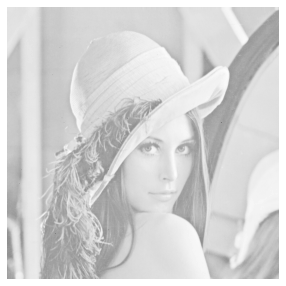

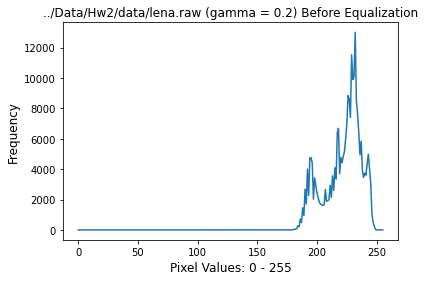

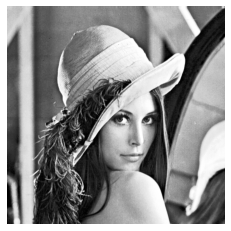

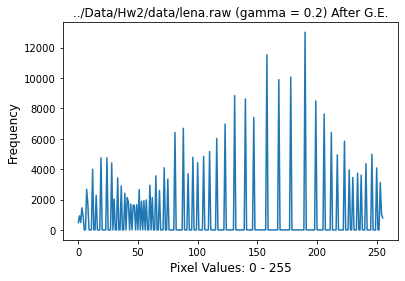

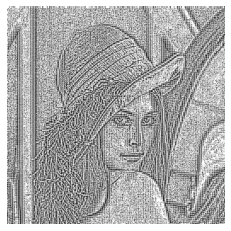

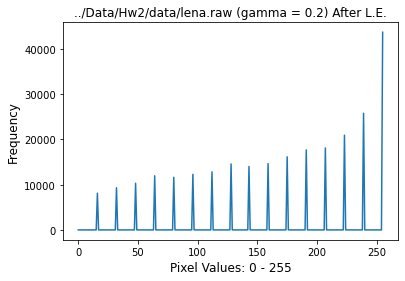

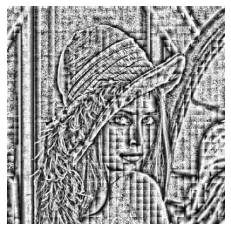

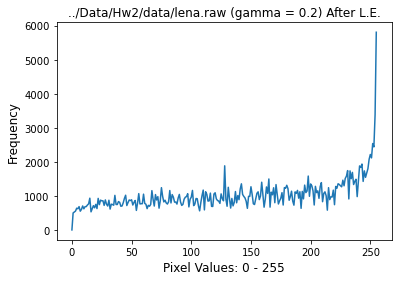

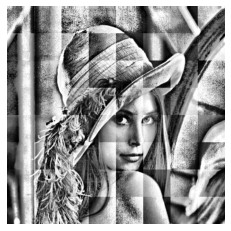

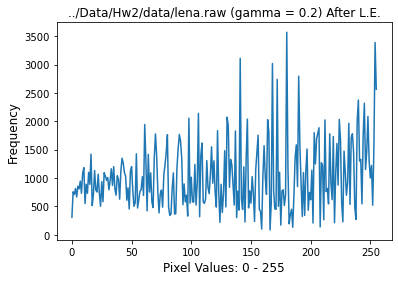

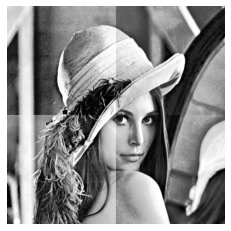

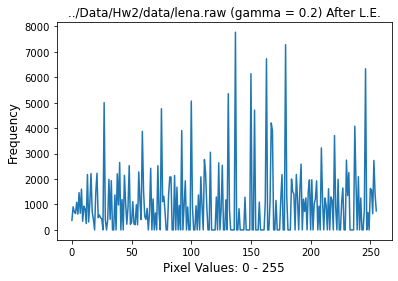

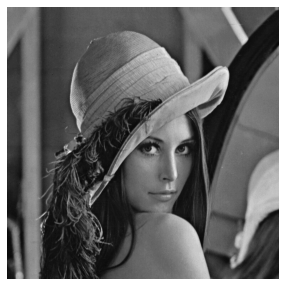

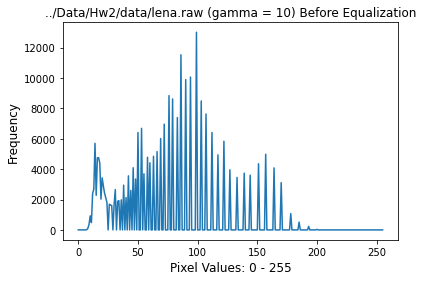

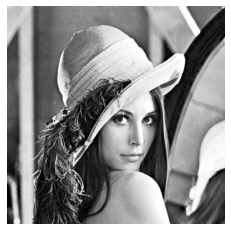

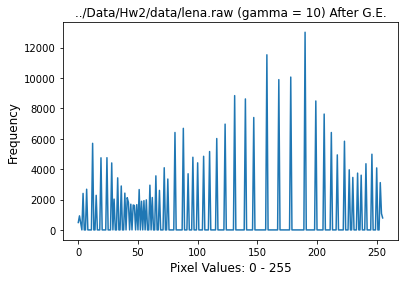

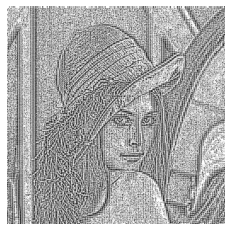

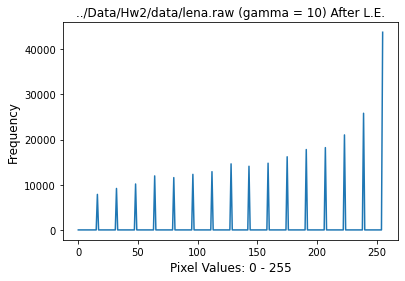

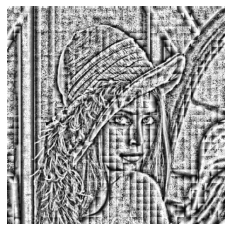

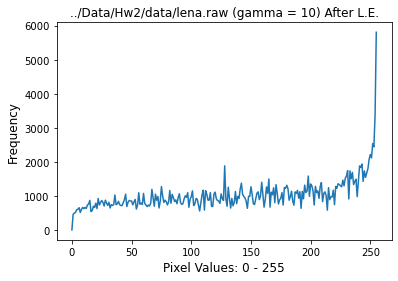

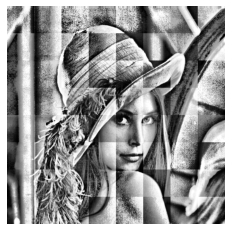

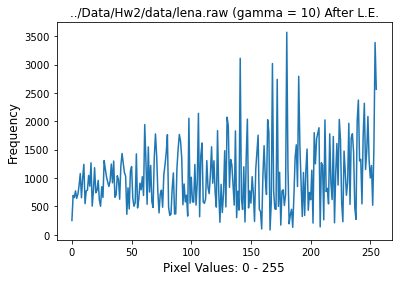

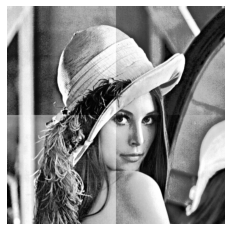

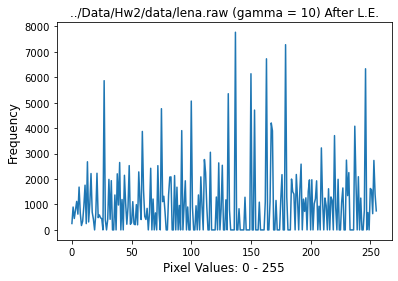

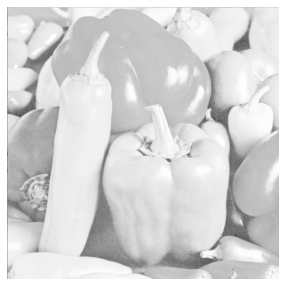

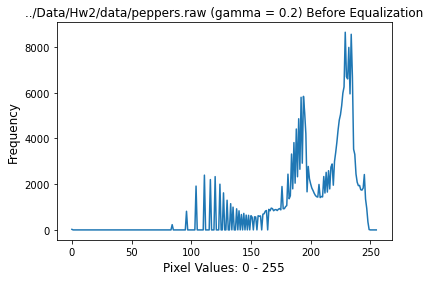

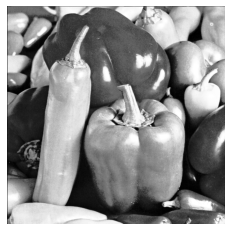

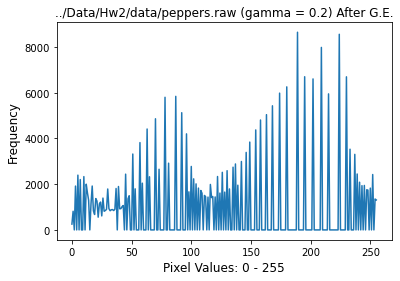

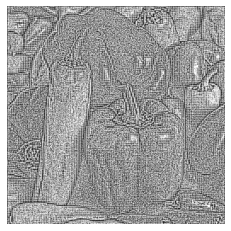

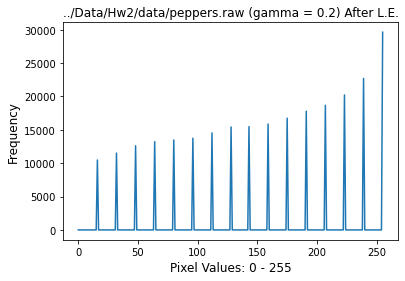

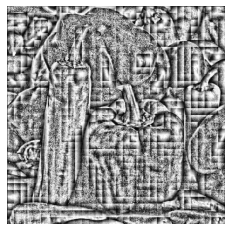

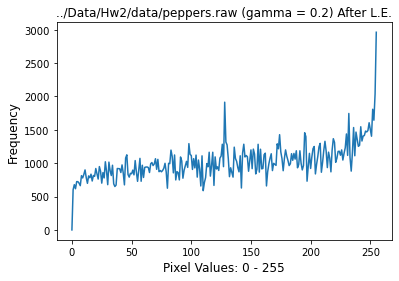

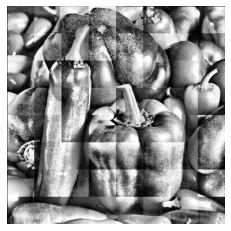

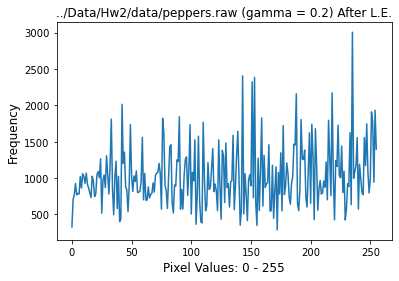

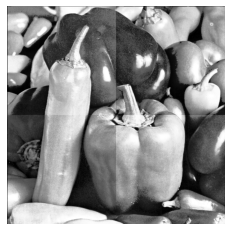

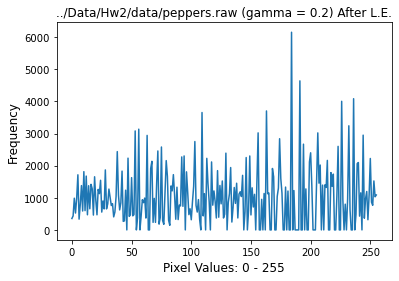

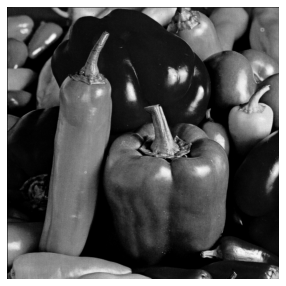

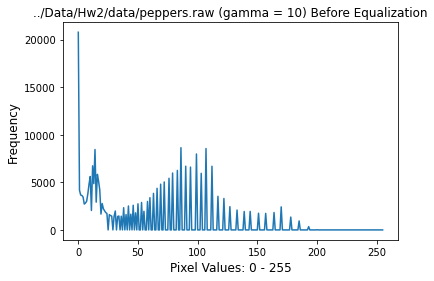

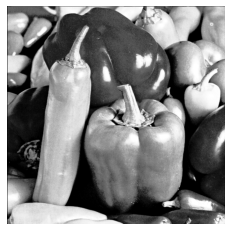

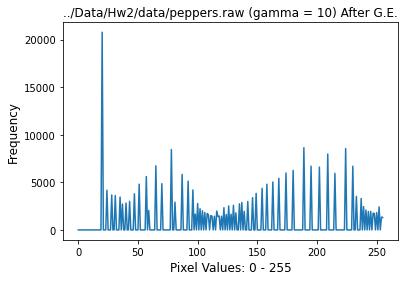

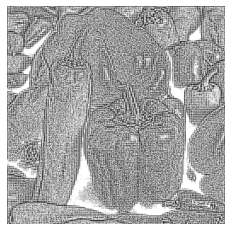

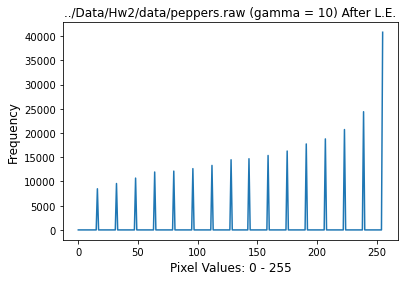

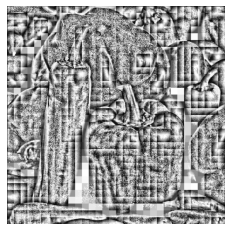

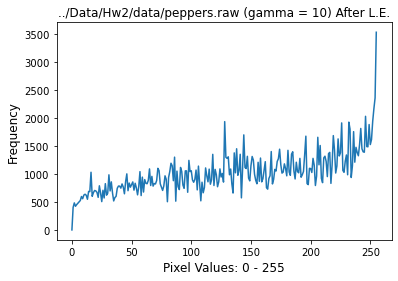

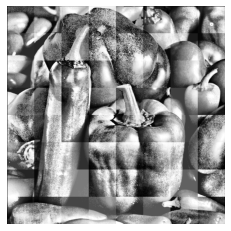

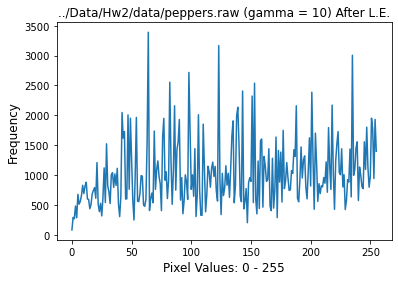

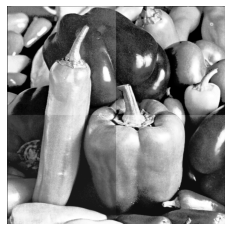

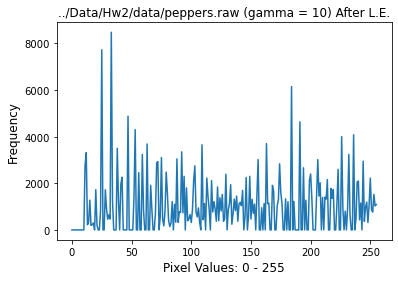

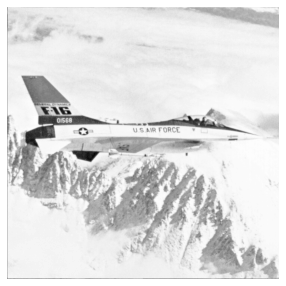

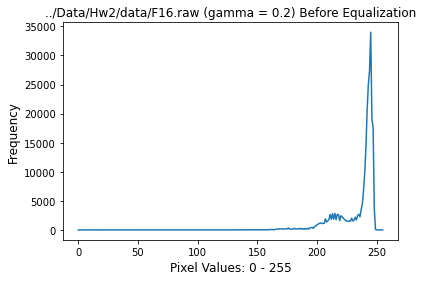

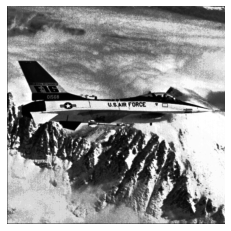

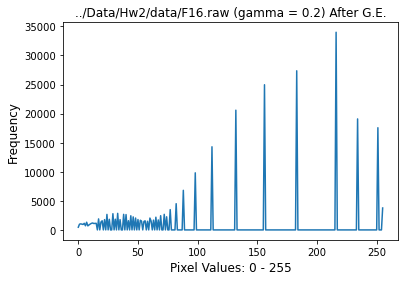

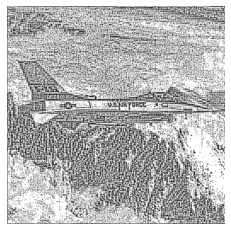

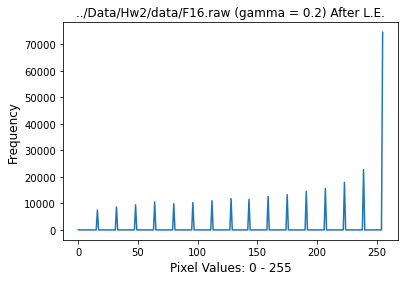

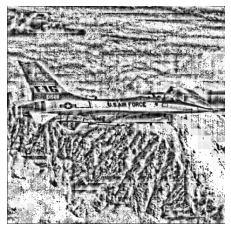

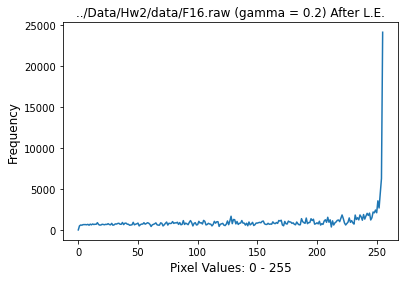

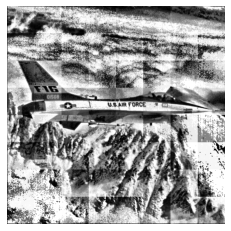

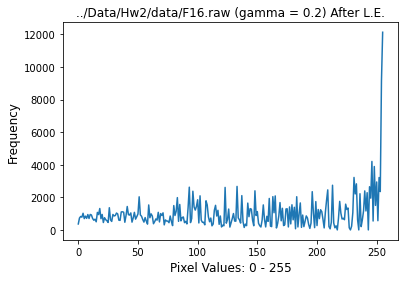

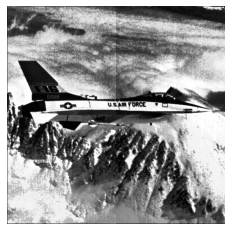

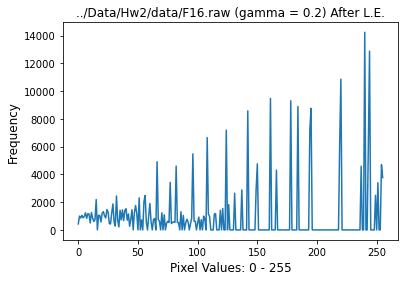

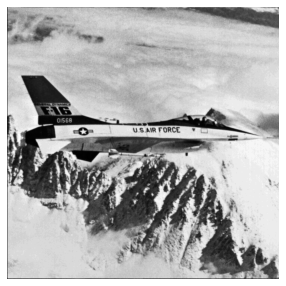

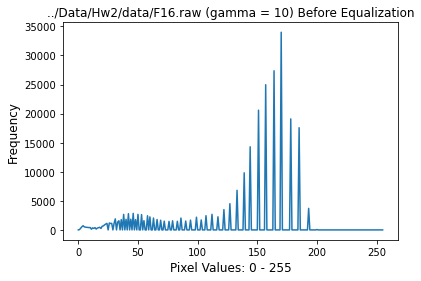

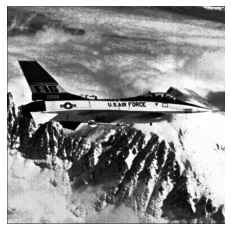

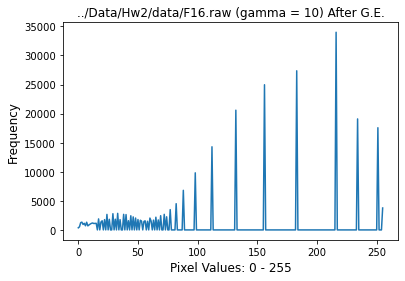

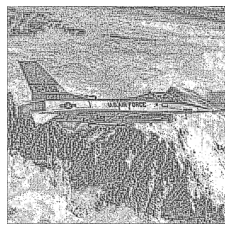

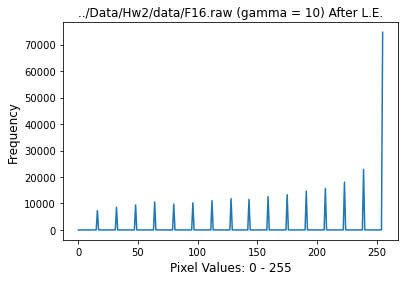

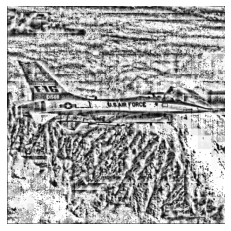

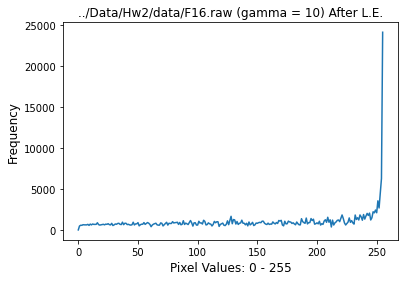

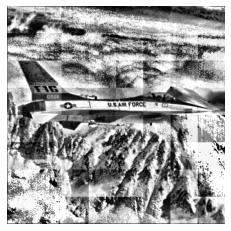

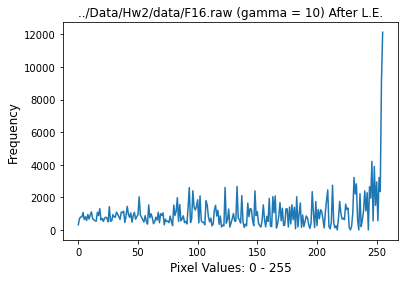

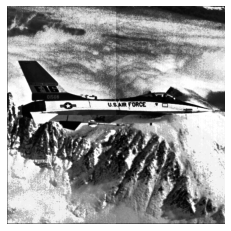

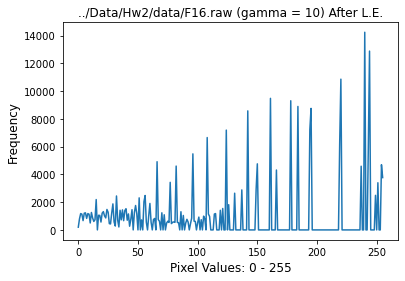

In [5]:
import matplotlib.pyplot as plt

FILENAME_LIST = ["lena.raw", "peppers.raw", "F16.raw"]

for file in FILENAME_LIST:
    fname = f"{BASE_DIR}{file}"
    mode = fname[-3:]
    img = jjcv_rd.common_read(fname, mode)

    img_enhance_gamma_small = jjcv_enhance.gamma_transform(img, gamma=0.2)
    eql_img, _ = jjcv_hist.global_histogram_equalization(img_enhance_gamma_small, fname,"(gamma = 0.2)", True)
    for window_size in [4, 16, 64, 256]:
        jjcv_hist.local_histogram_equalization(img, fname, "(gamma = 0.2)", window_size)

    img_enhance_gamma_large = jjcv_enhance.gamma_transform(img, gamma=10)
    eql_img, _  = jjcv_hist.global_histogram_equalization(img_enhance_gamma_large, fname, "(gamma = 10)", True)
    for window_size in [4, 16, 64, 256]:
        jjcv_hist.local_histogram_equalization(img, fname, "(gamma = 10)", window_size)

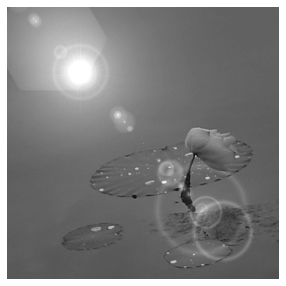

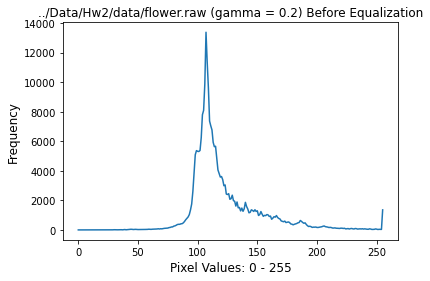

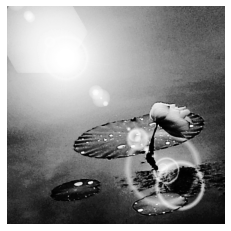

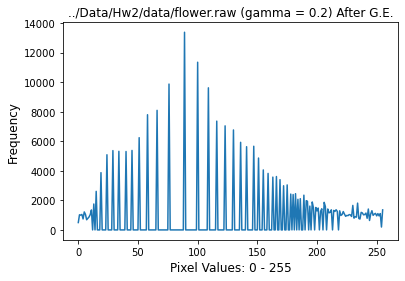

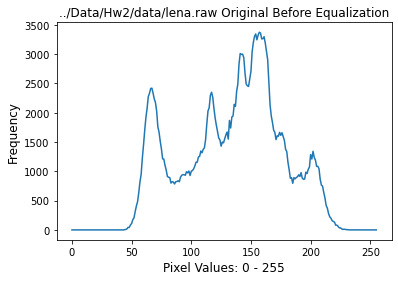

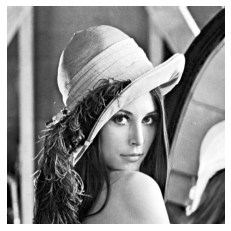

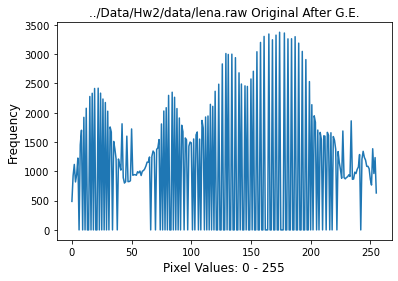

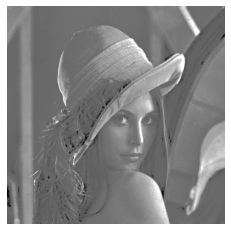

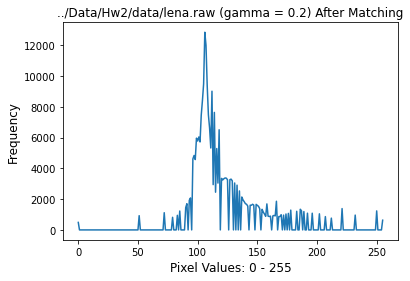

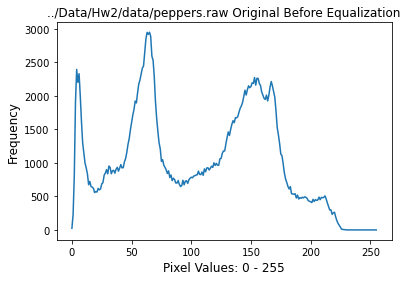

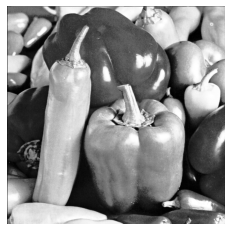

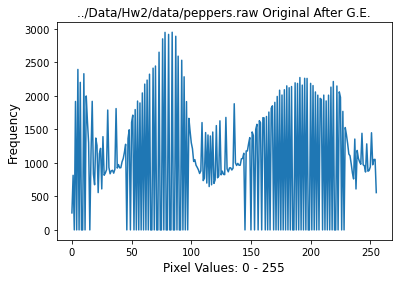

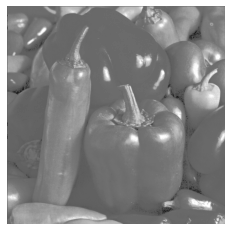

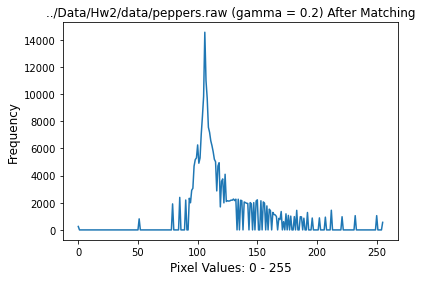

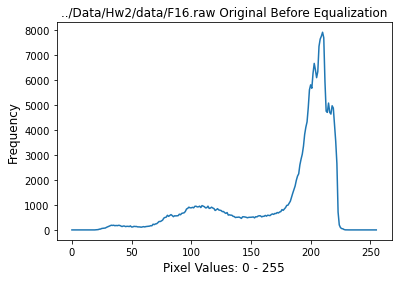

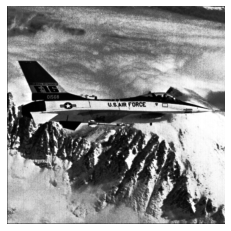

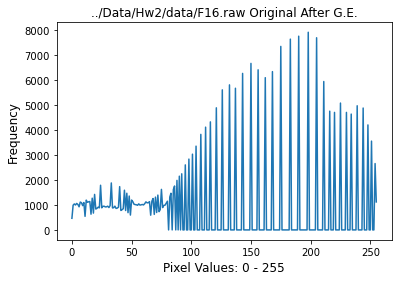

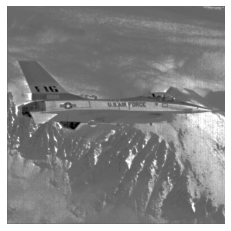

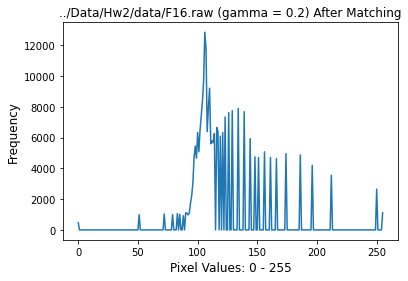

In [6]:
# Get Reference Image Matching Distribution
ref_fname = f"{BASE_DIR}flower.raw"
ref_img = jjcv_rd.read_and_draw(ref_fname, "raw")
_, ref_map_dict = jjcv_hist.global_histogram_equalization(ref_img, ref_fname,"(gamma = 0.2)", True)

backward_map = jjcv_hist.get_backward_map_from_ref_map_dict(ref_map_dict)


for file in FILENAME_LIST:
    fname = f"{BASE_DIR}{file}"
    img = jjcv_rd.common_read(fname, fname[-3:])
    
    # get equalized image
    eql_img, _ = jjcv_hist.global_histogram_equalization(img, fname,"Original", True)
    
    #  img change from equalized distribution to target distribution
    match_img = jjcv_hist.map_image(eql_img, backward_map)

    plt.imshow(match_img, cmap="gray");plt.axis("off");plt.show()

    d_hist, _, _ = jjcv_hist.init_containers()
    d_hist = jjcv_hist.make_histogram(match_img, d_hist)
    jjcv_hist.draw_histogram(title=f"{fname} (gamma = 0.2) After Matching", xlabel="Pixel Values: 0 - 255", ylabel="Frequency", x_axis=d_hist.keys(), y_axis=d_hist.values())

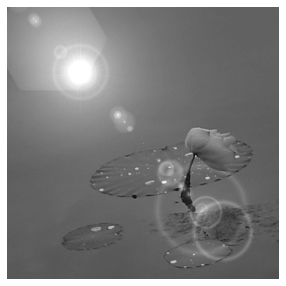

(512, 512)

In [9]:
ref_fname = f"{BASE_DIR}flower.raw"
ref_img = jjcv_rd.read_and_draw(ref_fname, "raw")

ref_img.shape

# Ref
- [Gaussian Filter Link 01](https://medium.com/@bob800530/python-gaussian-filter-%E6%A6%82%E5%BF%B5%E8%88%87%E5%AF%A6%E4%BD%9C-676aac52ea17)
- [Gaussian Filter Link 02](https://github.com/TheAlgorithms/Python/blob/master/digital_image_processing/filters/gaussian_filter.py)
- [Bilateral Filter Link](https://github.com/TheAlgorithms/Python/blob/master/digital_image_processing/filters/bilateral_filter.py)
- [Median Filter Link](https://github.com/TheAlgorithms/Python/blob/master/digital_image_processing/filters/median_filter.py)
- [Sobel Filter Link](https://github.com/TheAlgorithms/Python/blob/master/digital_image_processing/filters/sobel_filter.py)
- [Unsharp Mask Filter](https://github.com/soroushj/python-opencv-numpy-example/blob/master/unsharpmask.py)

[[1, 2, 3], [4, 5, 6], [7, 8, 9]]
[114 114 116 ...  92  93  91]


(512, 512)


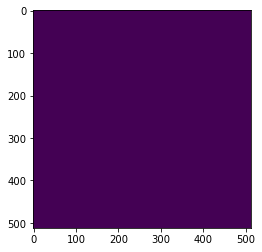

In [57]:


kernel = np.zeros((3,3))
result = jjcv_convolution(ref_img, kernel)

In [24]:
class JJCV_Filter():
    
    def __init__(self):
        
        pass
    
    def jjcv_flatten(m):
        m = np.array(m)
        flatten_m = list()
        for i in range(m.shape[0]):
            for j in range(m.shape[1]):
                flatten_m.append(m[i][j])
        return np.array(flatten_m)
    
    def jjcv_convolution(img, kernel):
    
        img_h = img.shape[0]
        img_w = img.shape[1]

        # Usually, kernel is square, but here we still use two varible to keep their dimensions
        kernel_h = kernel.shape[0]
        kernel_w = kernel.shape[1]
        kernel_flatten = jjcv_flatten(kernel)

        # We need to pad the image, or after convolution, the img will become smaller
        pad_h = kernel_h // 2
        pad_w = kernel_w // 2
        pad_img = np.zeros((img_h+pad_h*2, img_w+pad_w*2)).astype(int)
        pad_img[pad_h:-pad_h, pad_w:-pad_w] = ref_img

        # Convolution
        trans_img = np.zeros(img.shape).astype(int)
        for i in range(pad_h, img_h-pad_h):
            for j in range(pad_w, img_w-pad_w):
                x = trans_img[i-pad_h: i-pad_h+kernel_h, j-pad_w:j-pad_w+kernel_w]
                s = jjcv_flatten(x) * kernel_flatten
                trans_img[i][j] = s.sum()

        return trans_img.astype(int)

    # Yes, Have Reference
    def GaussianFilter(self, img, kernel_size): # p20, p23, p35
        pass
    
    def AveragingFilter(self, img, kernel_size): # p5
        pass
    
    # Yes, Have Reference
    def UnsharpMaskFilter(self, img, kernel_size):
        pass
    
    def LaplacianFilter(self, img, kernel_size):
        pass
    
    # Yes, Have Reference
    def SobelFilter(self, img, kernel_size):
        pass
    
    def Kernel_1(self, img, kernel_size): # p37
        pass
    
    def Kernel_2(self, img, kernel_size):
        pass
    
    # Yes, Have Reference
    def OrderStatFilter(self, img, kernel_size, mode):
        if mode == "Median": # p9
            pass
        elif mode == "MaxMin": #p10
            pass
        elif mode == "Midpoint": #p11
            pass
        elif mode == "AlphaTrimMean": #p12
            pass
    
    # Yes, Have Reference
    def BilateralFilter(self, img, kernel_size): # p24, p36, p47~p52
        pass
    
    def NonLocalMeansFilter(self, img, kernel_size): # p64~p66
        pass
    
    def NonLocalMeansFilterV2(self, img, kernel_size):
        pass